In [1]:
import sys
sys.path.append("../../Python")
import numpy as np
import feather
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import ROOT as R
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import json
from json import JSONEncoder

class NumpyArrayEncoder(JSONEncoder):
    """This is a helper class deriving from JSONEncoder to help write np.array objects to disk in JSON format.
    The code came from: https://pynative.com/python-serialize-numpy-ndarray-into-json/"""
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return JSONEncoder.default(self, obj)


print(f"Tensorflow version: {tf.__version__}")

Welcome to JupyROOT 6.29/01
Tensorflow version: 2.9.0


# ML Plots
Make plots from the ROOT files that create with the MLTrainer_exy.py program.


In [45]:
plot_file = "Layers_11_test"

with open(plot_file+".json", "r") as read_file:
    decodedArray = json.load(read_file)

loss_store = decodedArray['loss_store']
fit_mse_store = decodedArray['fit_mse_store']
val_mse_store = decodedArray['val_mse_store']

rbase = R.TFile("baseline_nofidcut_val.root")
t_base = rbase.Get("EcalTraining")
rdf_base = R.RDataFrame(t_base)
# rfile = R.TFile("electrons_n1_M6_val.root")
# electron_n1_L1_val.root
rfile = R.TFile(plot_file+"_val.root")
t_val = rfile.Get("EcalTraining")
rdf_val = R.RDataFrame(t_val)
col_names = rdf_val.GetColumnNames()
for n in col_names:
    print(n, end=" ")
print()

energy energy_NN energy_cor nhits one_over_e one_over_sqrt_e score_e score_x score_y seed_e true_e x x_NN x_cor y y_NN y_cor 


# ML Plots
Make plots from the ROOT files that create with the MLTrainer_exy.py program.


In [46]:
with open(plot_file+".json", "r") as read_file:
    decodedArray = json.load(read_file)

loss_store = np.array(decodedArray['loss_store'])
fit_mse_store = np.array(decodedArray['fit_mse_store'])
val_mse_store = np.array(decodedArray['val_mse_store'])

rbase = R.TFile("baseline_nofidcut_val.root")
t_base = rbase.Get("EcalTraining")
rdf_base = R.RDataFrame(t_base)
# rfile = R.TFile("electrons_n1_M6_val.root")
# electron_n1_L1_val.root
rfile = R.TFile(plot_file+"_val.root")
t_val = rfile.Get("EcalTraining")
rdf_val = R.RDataFrame(t_val)
col_names = rdf_val.GetColumnNames()
for n in col_names:
    print(n, end=" ")
print()

energy energy_NN energy_cor nhits one_over_e one_over_sqrt_e score_e score_x score_y seed_e true_e x x_NN x_cor y y_NN y_cor 


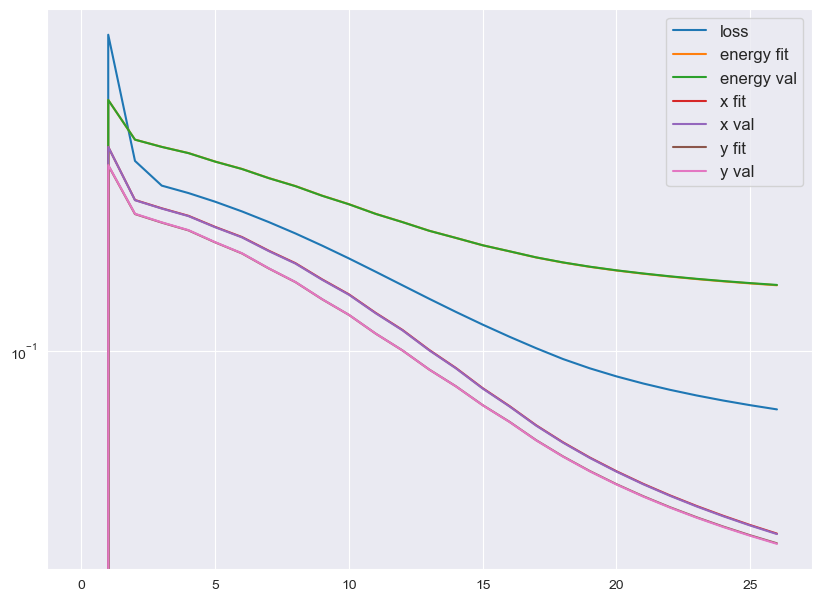

In [52]:
start = -360
fig=plt.figure(figsize=(9,7))
axes = fig.add_axes([0.1,0.1,0.85,0.8])
axes.plot(loss_store[start:], label="loss")
axes.plot(fit_mse_store[start:,0], label="energy fit")
axes.plot(val_mse_store[start:,0], label="energy val")
axes.plot(fit_mse_store[start:,1], label="x fit")
axes.plot(val_mse_store[start:,1], label="x val")
axes.plot(fit_mse_store[start:,2], label="y fit")
axes.plot(val_mse_store[start:,2], label="y val")
plt.yscale("log")
axes.legend(fontsize=12)
plt.show()

In [48]:
h_true = rdf_val.Histo1D(("h_true", "True Energy;E [GeV]", 1000, 0., 6.), "score_e")
h_clus = rdf_val.Histo1D(("h_clus", "Cluster Energy;E [GeV]", 1000, 0., 6.), "energy")
h_clus_cor = rdf_val.Histo1D(("h_clus_cor", "Cluster Energy Cor;E [GeV]", 1000, 0., 6.), "energy_cor")
h_linval = rdf_base.Histo1D(("h_linval", "LinFit Energy;E [GeV]", 1000, 0., 6.), "energy_NN")
h_val = rdf_val.Histo1D(("h_val", "Fit Energy;E [GeV]", 1000, 0., 6.), "energy_NN")
h_df_clus = rdf_val.Define("d", "score_e - energy").Histo1D(
    ("h_df_clus", "Diff True - Cluster E;#Delta E [GeV]", 1000, -0.5, 1.), "d")
h_df_clus_cor = rdf_val.Define("d", "score_e - energy_cor").Histo1D(
    ("h_df_clus_cor", "Diff True - Corrected Cluster E;#Delta E [GeV]", 1000, -0.5, 1.), "d")
h_df_val = rdf_val.Define("d", "score_e - energy_NN").Histo1D(
    ("h_df_val", "Diff True - Fit E;#Delta E [GeV]", 1000, -0.5, 1.), "d")
h_df_linval = rdf_base.Define("d", "score_e - energy_NN").Histo1D(
    ("h_df_linval", "Diff True - LinFit E;#Delta E [GeV]", 1000, -0.5, 1.), "d")
h_df_clus_x = rdf_val.Define("d", "score_x - x").Histo1D(("h_df_clus_x","Diff Score_x - x; x [mm]", 1000, -10, 10),"d")
h_df_clus_cor_x = rdf_val.Define("d", "score_x - x_cor").Histo1D(("h_df_clus_cor_x","Diff Score_x - x cor; x [mm]", 1000, -10, 10),"d")
h_df_val_x = rdf_val.Define("d", "score_x - x_NN").Histo1D(("h_df_val_x","Diff Score_x - Fit x; x [mm]", 1000, -10, 10),"d")
h_df_linval_x = rdf_base.Define("d", "score_x - x_NN").Histo1D(("h_df_val_x","Diff Score_x - LinFit x; x [mm]", 1000, -10, 10),"d")

h_df_clus_y = rdf_val.Define("d", "score_y - y").Histo1D(("h_df_clus_y","Diff Score_y - y; y [mm]", 1000, -10, 10),"d")
h_df_clus_cor_y = rdf_val.Define("d", "score_y - y_cor").Histo1D(("h_df_clus_cor_y","Diff Score_y - y cor; y [mm]", 1000, -10, 10),"d")
h_df_val_y = rdf_val.Define("d", "score_y - y_NN").Histo1D(("h_df_val_y","Diff Score_y - Fit y; y [mm]", 1000, -10, 10),"d")
h_df_linval_y = rdf_base.Define("d", "score_y - y_NN").Histo1D(("h_df_val_y","Diff Score_y - LinFit y; y [mm]", 1000, -10, 10),"d")
h2_dfe_e = rdf_val.Define("d","score_e - energy_NN").Histo2D(("h2_dfe_e","Diff E vs E;score_e[GeV];#Delta E[GeV]",200,0.,6.,100,-0.5,1.),"score_e","d")
h2_dfe_x = rdf_val.Define("d","score_e - energy_NN").Histo2D(("h2_dfe_x","Diff E vs X;score_x[mm];#Delta E[GeV]",200,-350.,350.,100,-0.5,1.),"score_x","d")
h2_dfe_y = rdf_val.Define("d","score_e - energy_NN").Histo2D(("h2_dfe_y","Diff E vs Y;score_y[mm];#Delta E[GeV]",200,-100.,100.,100,-0.5,1.),"score_y","d")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cc1
Info in <TCanvas::Print>: pdf file Layers_11_test_compare.pdf has been created


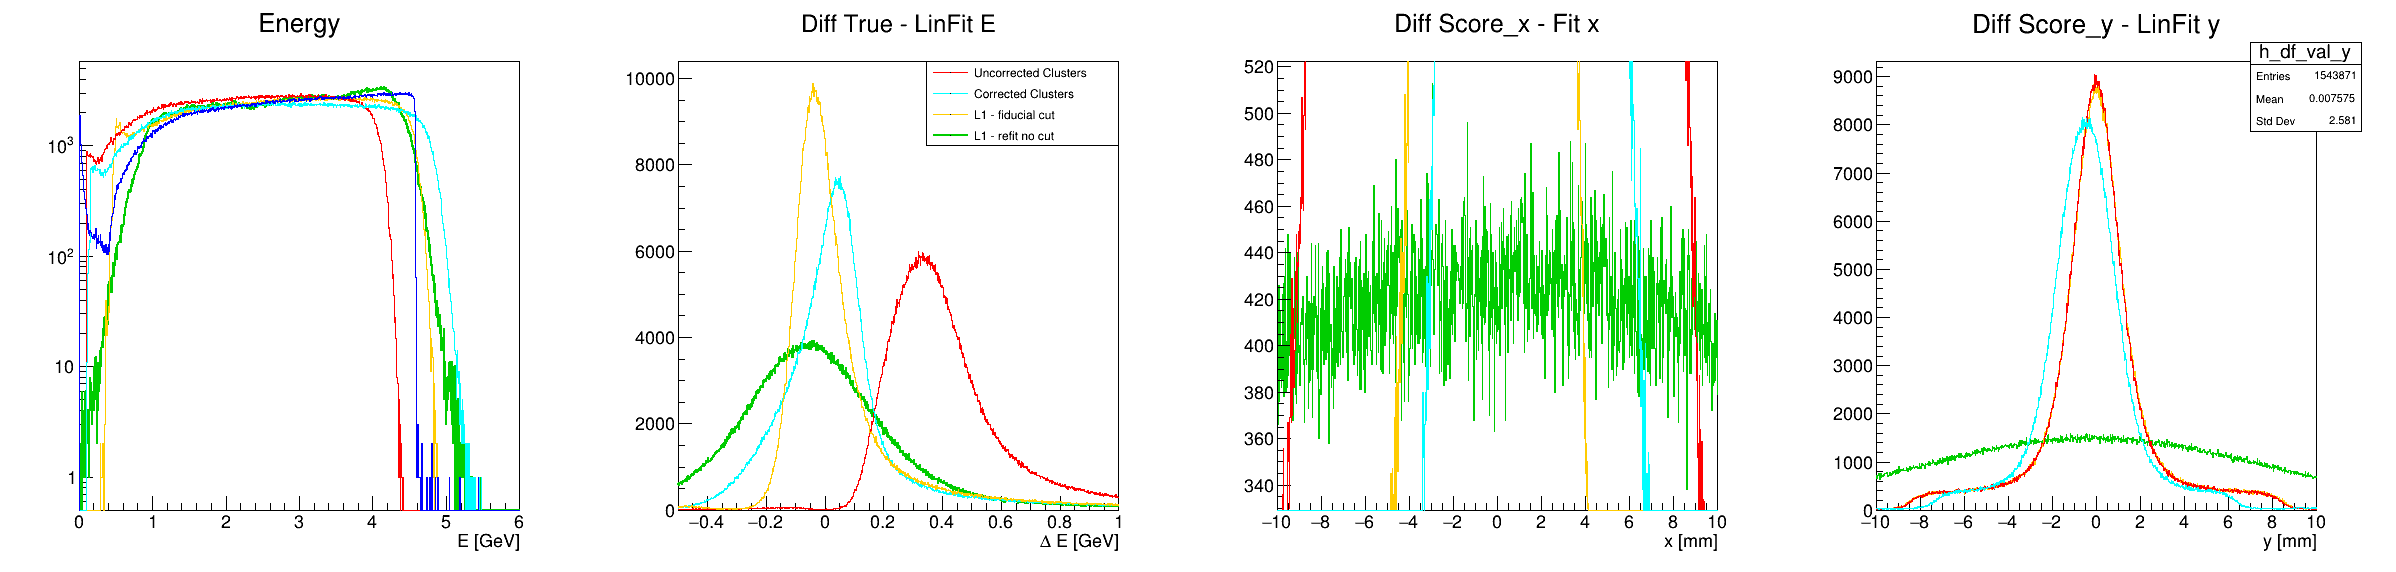

In [49]:
cc1 = R.TCanvas("cc1", "cc1", 2400, 600)
cc1.Divide(4, 1)
# cc1 = R.TCanvas("cc1", "cc1", 1200, 1200)
# cc1.Divide(2, 2)
p1 = cc1.cd(1)
p1.SetLogy()
h_clus.SetLineColor(R.kRed)
h_clus_cor.SetLineColor(R.kCyan)
h_linval.SetLineColor(R.kOrange)
h_val.SetLineColor(R.kGreen+1)
h_val.SetLineWidth(2)
h_val.SetStats(0)
h_true.SetTitle("Energy")
h_true.SetStats(0)
h_true.Draw()
h_val.Draw("same")
h_linval.Draw("same")
h_clus.Draw("same")
h_clus_cor.Draw("same")
h_true.SetLineColor(R.kBlue)
h_true.Draw("same")
p2 = cc1.cd(2)
h_df_clus.SetLineColor(R.kRed)
h_df_clus_cor.SetLineColor(R.kCyan)
h_df_linval.SetLineColor(R.kOrange)
h_df_val.SetLineColor(R.kGreen+1)
h_df_val.SetLineWidth(2)
h_df_val.SetStats(0)
h_df_val.SetTitle("True Energy - Energy")
h_df_linval.SetStats(0)
h_df_linval.Draw()
h_df_val.Draw("same")
h_df_clus.Draw("same")
h_df_clus_cor.Draw("same")
h_df_linval.Draw("same")
leg1_p2 = R.TLegend(0.55, 0.75, 0.9, 0.9)
leg1_p2.AddEntry(h_df_clus.GetPtr(), "Uncorrected Clusters")
leg1_p2.AddEntry(h_df_clus_cor.GetPtr(), "Corrected Clusters")
leg1_p2.AddEntry(h_df_linval.GetPtr(),"L1 - fiducial cut")
leg1_p2.AddEntry(h_df_val.GetPtr(), "L1 - refit no cut")
leg1_p2.Draw()
p3 = cc1.cd(3)
h_df_val_x.SetStats(0)
h_df_val_x.SetLineColor(R.kGreen+1)
h_df_val_x.Draw("same")
h_df_linval_x.SetLineColor(R.kOrange)
h_df_linval_x.Draw("same")
h_df_clus_x.SetStats(0)
h_df_clus_x.SetLineColor(R.kRed)
h_df_clus_x.Draw("same")
h_df_clus_cor_x.SetStats(0)
h_df_clus_cor_x.SetLineColor(R.kCyan)
h_df_clus_cor_x.Draw("same")

p4 = cc1.cd(4)
h_df_val_y.SetStats(0)
h_df_val_y.SetLineColor(R.kGreen+1)
h_df_linval_y.Draw()
h_df_val_y.Draw("same")
h_df_linval_y.SetLineColor(R.kOrange)
h_df_linval_y.Draw("same")

h_df_clus_y.SetStats(0)
h_df_clus_y.SetLineColor(R.kRed)
h_df_clus_y.Draw("same")

h_df_clus_cor_y.SetStats(0)
h_df_clus_cor_y.SetLineColor(R.kCyan)
h_df_clus_cor_y.Draw("same")

cc1.Draw()
cc1.SaveAs(plot_file+"_compare.pdf")

In [50]:
print("ENERGY:")
print(f"Ecal cluster, N = {h_df_clus_cor.GetEntries():8.0f} mu = {h_df_clus_cor.GetMean():8.5f} rms={h_df_clus_cor.GetRMS():8.5f}")
print(f"Lin. Reg fit, N = {h_df_linval.GetEntries():8.0f} mu = {h_df_linval.GetMean():8.5f} rms={h_df_linval.GetRMS():8.5f}")
print(f"Deep Learning N = {h_df_val.GetEntries():8.0f} mu = {h_df_val.GetMean():8.5f} rms={h_df_val.GetRMS():8.5f}")
print("\n X Position")
print(f"Ecal cluster, N = {h_df_clus_cor_x.GetEntries():8.0f} mu = {h_df_clus_cor_x.GetMean():8.5f} rms={h_df_clus_cor_x.GetRMS():8.5f}")
print(f"Lin. Reg fit, N = {h_df_linval_x.GetEntries():8.0f} mu = {h_df_linval_x.GetMean():8.5f} rms={h_df_linval_x.GetRMS():8.5f}")
print(f"Deep Learning N = {h_df_val_x.GetEntries():8.0f} mu = {h_df_val_x.GetMean():8.5f} rms={h_df_val_x.GetRMS():8.5f}")

print("\n Y Position")
print(f"Ecal cluster, N = {h_df_clus_cor_y.GetEntries():8.0f} mu = {h_df_clus_cor_y.GetMean():8.5f} rms={h_df_clus_cor_y.GetRMS():8.5f}")
print(f"Lin. Reg fit, N = {h_df_linval_y.GetEntries():8.0f} mu = {h_df_linval_y.GetMean():8.5f} rms={h_df_linval_y.GetRMS():8.5f}")
print(f"Deep Learning N = {h_df_val_y.GetEntries():8.0f} mu = {h_df_val_y.GetMean():8.5f} rms={h_df_val_y.GetRMS():8.5f}")


ENERGY:
Ecal cluster, N =  1543871 mu =  0.04278 rms= 0.20678
Lin. Reg fit, N =  1543871 mu =  0.04915 rms= 0.19723
Deep Learning N =  1543871 mu = -0.00922 rms= 0.25374

 X Position
Ecal cluster, N =  1543871 mu =  1.00265 rms= 2.19802
Lin. Reg fit, N =  1543871 mu = -0.18406 rms= 1.99708
Deep Learning N =  1543871 mu =  0.02013 rms= 5.72401

 Y Position
Ecal cluster, N =  1543871 mu = -0.46962 rms= 2.16831
Lin. Reg fit, N =  1543871 mu =  0.00758 rms= 2.58055
Deep Learning N =  1543871 mu = -0.04595 rms= 5.18834


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cc2


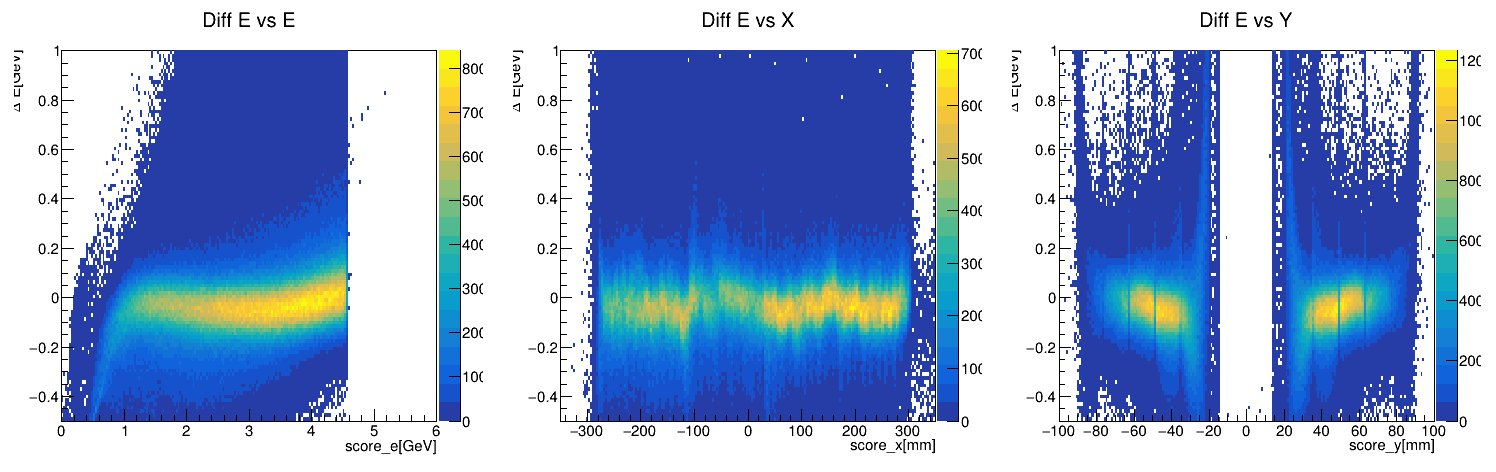

In [28]:
cc2 = R.TCanvas("cc2", "cc2", 1500, 500)
cc2.Divide(3,1)
p1 = cc2.cd(1)
h2_dfe_e.SetStats(0)
h2_dfe_e.Draw("colz")
p2 = cc2.cd(2)
h2_dfe_x.SetStats(0)
h2_dfe_x.Draw("colz")
p3 = cc2.cd(3)
h2_dfe_y.SetStats(0)
h2_dfe_y.Draw("colz")
cc2.Draw()